In [1]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab_Notebooks/cs3220_A1_task"

Mounted at /content/drive


**The JSON Data Format**

A lot of data in the real world is naturally hierarchical.
The JavaScript Object Notation, or JSON, data format is a popular way to represent hierarchical data. Despite its name, its application extends far beyond JavaScript, the language for which it was originally designed.

In [3]:
file_name = "tvshows.json"

In [4]:
import json
import io
import os

In [5]:
#this will locate all the JSON files inside the main Directory and any sub-Folder:
json_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith((".json"))] #If we needed to read several files extensions: if name.endswith((".ext1", ".ext2"))

print('Number of JSON files ready to be loaded: ' + str(len(json_files)))

Number of JSON files ready to be loaded: 1


In [6]:
json_files

['/content/drive/MyDrive/Colab_Notebooks/cs3220_A1_task/tvshows.json']

In [7]:
print('Path to the first file: '+json_files[0])

Path to the first file: /content/drive/MyDrive/Colab_Notebooks/cs3220_A1_task/tvshows.json


In [8]:
#Open the file using the name of the json file witn open() function
#Read the json file using load() and put the json data into a variable.
with open(json_files[0]) as f:
   json_data = json.load(f)


Let's take a look at the first character of a JSON file.
(**Warning**: Never try to print the entire contents of a JSON file in a Jupyter notebook; this will freeze the notebook if the file is large!

In [ ]:
json_data[0]# data for the show "Girls"

{'id': 139,
 'url': 'http://www.tvmaze.com/shows/139/girls',
 'name': 'Girls',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Romance'],
 'status': 'Ended',
 'runtime': 30,
 'premiered': '2012-04-15',
 'officialSite': 'http://www.hbo.com/girls',
 'schedule': {'time': '22:00', 'days': ['Sunday']},
 'rating': {'average': 6.9},
 'weight': 75,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'}},
 'webChannel': None,
 'externals': {'tvrage': 30124, 'thetvdb': 220411, 'imdb': 'tt1723816'},
 'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_portrait/31/78286.jpg',
  'original': 'http://static.tvmaze.com/uploads/images/original_untouched/31/78286.jpg'},
 'summary': '<p>This Emmy winning series is a comic look at the assorted humiliations and rare triumphs of a group of girls in their 20s.</p>',
 'updated': 1577601053,
 'cast': [{'person': {'id': 27410,
    'url': 'http://www.tvm

A "variable"  with multiple values is called a *repeated field*. A repeated field might itself contain a repeated field (e.g., each show has multiple seasons, and each season in turn has multiple episodes), creating a hierarchy of variables. Repeated fields are represented as lists or arrays in JSON.

In [9]:
json_data[0].keys() #the top-level variables associated with each TV show.

dict_keys(['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'premiered', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webChannel', 'externals', 'image', 'summary', 'updated', 'cast', 'seasons'])

In [10]:
data_shows=[]

In [11]:
for show in json_data[:5]:
  data_show={}
  data_show['id']=show['id']
  data_show['name']=show['name']
  data_show['genres']=show['genres']
  #print(data_show)
  data_shows.append(data_show)


In [12]:
data_shows

[{'id': 139, 'name': 'Girls', 'genres': ['Drama', 'Romance']},
 {'id': 722, 'name': 'The Golden Girls', 'genres': ['Drama', 'Comedy']},
 {'id': 23542, 'name': 'Good Girls', 'genres': ['Drama', 'Comedy', 'Crime']},
 {'id': 6771,
  'name': 'The Powerpuff Girls',
  'genres': ['Comedy', 'Action', 'Science-Fiction']},
 {'id': 42726, 'name': 'Florida Girls', 'genres': ['Comedy']}]

In [13]:
class Show:
  def __init__(self,id,name):
    self._id=id
    self.name=name
    self.genres=[]

    @property
    def id(self):
        return self._id

    @id.setter
    def name(self, value):
        self._id = value

  def append(self, genre):
        assert isinstance(genre, str) #this code will check if genre is an instance
                                        #of the String class. If not, an exception
                                        #will be raised
        #append the genre to our list
        self.genres.append(genre)

  def __iter__(self):
        for genre in self.genres:
            yield genre

  def __contains__(self, genre):
      if genre in self.genres:
        return True
      else:
        return False

  def __str__(self):
      return f'The show {self._id} has a name {self.name}'




In [14]:
for data_show in data_shows:
  show=Show(data_show['id'],data_show['name'])
  for genre in data_show['genres']:
    show.append(genre)
  print(show)
  print("The genres are:")
  for genre in show:
    print(genre)




The show 139 has a name Girls
The genres are:
Drama
Romance
The show 722 has a name The Golden Girls
The genres are:
Drama
Comedy
The show 23542 has a name Good Girls
The genres are:
Drama
Comedy
Crime
The show 6771 has a name The Powerpuff Girls
The genres are:
Comedy
Action
Science-Fiction
The show 42726 has a name Florida Girls
The genres are:
Comedy


In [15]:
class Show:
  def __init__(self,id,name):
    self._id=id
    self.name=name
    self.genres=[]
    #This will be a dictionary in which the keys are show's ID
    #and the values are the weight of the relation (an integer)
    self.relations = {}

    @property
    def id(self):
        return self._id

    @id.setter
    def name(self, value):
        self._id = value

  def append(self, genre):
        assert isinstance(genre, str)
        self.genres.append(genre)

  def __iter__(self):
        for genre in self.genres:
            yield genre

  def __contains__(self, genre):
      if genre in self.genres:
        return True
      else:
        return False

  def __str__(self):
      return f'The show {self._id} has a name {self.name}'

  def addrelation(self, showID):
        if showID and showID != self._id: #show must not be empty, and must not be the show itself
            if showID in self.relations:
                #the show is already in our relations, strengthen the bond:
                self.relations[showID] += 1
            else:
                #the show is not in our relations, create a new bond:
                self.relations[showID] = 1


  def computerelations(self, graph):
    for show in graph:
      for genre in show:
        if genre in self.genres:
          self.addrelation(show._id)





In [16]:
class ShowGraph:
    def __init__(self, corpus):
        #initialisation of dictionary that will store all shows. They keys are the IDs, the values are Show objects.
        self.shows = {}
        #Load the show corpus
        for data_show in corpus:
          show=Show(data_show['id'],data_show['name'])
          for genre in data_show['genres']:
               show.append(genre)
          self.shows[data_show['id']]=show

    def __iter__(self):
        for show in self.shows.values():
            yield show


In [17]:
corpusData=data_shows

In [18]:
showGraph=ShowGraph(corpusData)

In [19]:
for show in showGraph:
  print(show)

The show 139 has a name Girls
The show 722 has a name The Golden Girls
The show 23542 has a name Good Girls
The show 6771 has a name The Powerpuff Girls
The show 42726 has a name Florida Girls


In [20]:
data_shows

[{'id': 139, 'name': 'Girls', 'genres': ['Drama', 'Romance']},
 {'id': 722, 'name': 'The Golden Girls', 'genres': ['Drama', 'Comedy']},
 {'id': 23542, 'name': 'Good Girls', 'genres': ['Drama', 'Comedy', 'Crime']},
 {'id': 6771,
  'name': 'The Powerpuff Girls',
  'genres': ['Comedy', 'Action', 'Science-Fiction']},
 {'id': 42726, 'name': 'Florida Girls', 'genres': ['Comedy']}]

In [21]:
class ShowGraph:
    def __init__(self, corpus):
        #initialisation of dictionary that will store all shows. They keys are the IDs, the values are Show objects.
        self.shows = {}
        #Load the show corpus
        for data_show in corpus:
          show=Show(data_show['id'],data_show['name'])
          for genre in data_show['genres']:
               show.append(genre)
          self.shows[data_show['id']]=show

    def __iter__(self):
        for show in self.shows.values():
            yield show

    #Compute relations between users
    def buildRelations(self):
        for show in self:
            show.computerelations(self)

In [22]:
showGraph=ShowGraph(corpusData)
showGraph.buildRelations()

In [23]:
for show in showGraph:
  print(show)
  print("The relations are:")
  for x, y in show.relations.items():
    print(x, y)


The show 139 has a name Girls
The relations are:
722 1
23542 1
The show 722 has a name The Golden Girls
The relations are:
139 1
23542 2
6771 1
42726 1
The show 23542 has a name Good Girls
The relations are:
139 1
722 2
6771 1
42726 1
The show 6771 has a name The Powerpuff Girls
The relations are:
722 1
23542 1
42726 1
The show 42726 has a name Florida Girls
The relations are:
722 1
23542 1
6771 1


In [24]:
class Show:
  def __init__(self,id,name):
    self._id=id
    self.name=name
    self.genres=[]
    #This will be a dictionary in which the keys are show's ID
    #and the values are the weight of the relation (an integer)
    self.relations = {}

    @property
    def id(self):
        return self._id

    @id.setter
    def name(self, value):
        self._id = value

  def append(self, genre):
        assert isinstance(genre, str)
        self.genres.append(genre)

  def __iter__(self):
        for genre in self.genres:
            yield genre

  def __contains__(self, genre):
      if genre in self.genres:
        return True
      else:
        return False

  def __str__(self):
      return f'The show {self._id} has a name {self.name}'

  def addrelation(self, showID):
        if showID and showID != self._id: #show must not be empty, and must not be the show itself
            if showID in self.relations:
                #the show is already in our relations, strengthen the bond:
                self.relations[showID] += 1
            else:
                #the show is not in our relations, create a new bond:
                self.relations[showID] = 1

  def computerelations(self, graph):
    for show in graph:
      for genre in show:
        if genre in self.genres:
          self.addrelation(show._id)

  def printrelations(self):
    for showID, weight in self.relations.items():
      print(f"with {showID}: {weight}")



In [25]:
showGraph=ShowGraph(corpusData)
showGraph.buildRelations()

In [26]:
for show in showGraph:
  print(show)
  print("The relations are:")
  show.printrelations()

The show 139 has a name Girls
The relations are:
with 722: 1
with 23542: 1
The show 722 has a name The Golden Girls
The relations are:
with 139: 1
with 23542: 2
with 6771: 1
with 42726: 1
The show 23542 has a name Good Girls
The relations are:
with 139: 1
with 722: 2
with 6771: 1
with 42726: 1
The show 6771 has a name The Powerpuff Girls
The relations are:
with 722: 1
with 23542: 1
with 42726: 1
The show 42726 has a name Florida Girls
The relations are:
with 722: 1
with 23542: 1
with 6771: 1


In [27]:
class Show:
  def __init__(self,id,name):
    self._id=id
    self.name=name
    self.genres=[]
    #This will be a dictionary in which the keys are show's ID
    #and the values are the weight of the relation (an integer)
    self.relations = {}

    @property
    def id(self):
        return self._id

    @id.setter
    def name(self, value):
        self._id = value

  def append(self, genre):
        assert isinstance(genre, str)
        self.genres.append(genre)

  def __iter__(self):
        for genre in self.genres:
            yield genre

  def __contains__(self, genre):
      if genre in self.genres:
        return True
      else:
        return False

  def __str__(self):
      return f'The show {self._id} has a name {self.name}'

  def addrelation(self, showID):
        if showID and showID != self._id: #show must not be empty, and must not be the show itself
            if showID in self.relations:
                #the show is already in our relations, strengthen the bond:
                self.relations[showID] += 1
            else:
                #the show is not in our relations, create a new bond:
                self.relations[showID] = 1

  def computerelations(self, graph):
    for show in graph:
      for genre in show:
        if genre in self.genres:
          self.addrelation(show._id)

  def printrelations(self):
    for showID, weight in self.relations.items():
      print(f"with {showID}: {weight}")

  def getStrength(self):
    return sum(self.relations.values())



In [28]:
showGraph=ShowGraph(corpusData)
showGraph.buildRelations()

In [33]:
visualisationData={}
legendData=[]
for show in showGraph:
  print(show)
  print(f"Strength: {show.getStrength()}")
  visualisationData[show._id]=show.getStrength()
  legendData.append(show.name)



The show 139 has a name Girls
Strength: 2
The show 722 has a name The Golden Girls
Strength: 5
The show 23542 has a name Good Girls
Strength: 5
The show 6771 has a name The Powerpuff Girls
Strength: 3
The show 42726 has a name Florida Girls
Strength: 3


In [34]:
visualisationData

{139: 2, 722: 5, 23542: 5, 6771: 3, 42726: 3}

In [35]:
legendData

['Girls',
 'The Golden Girls',
 'Good Girls',
 'The Powerpuff Girls',
 'Florida Girls']

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

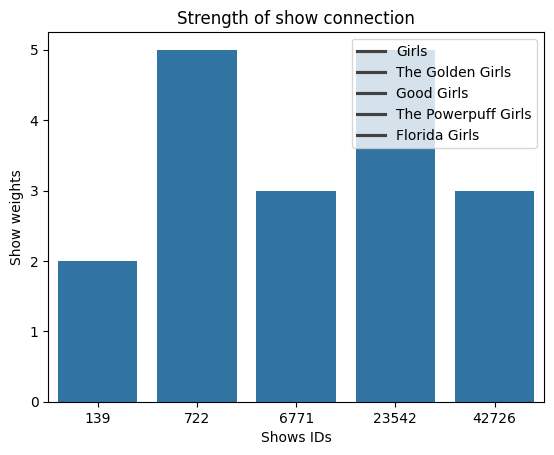

In [46]:
#Configure your x and y values from the dictionary:
x= list(visualisationData.keys())
y=list(visualisationData.values())

#Create the graph = create seaborn barplot
ax=sns.barplot(x=x,y=y)

#specfiy axis labels
ax.legend(legendData)
ax.set(xlabel='Shows IDs',
       ylabel='Show weights',
       title='Strength of show connection')

#display barplot
plt.show()


**NetworkX**

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
NetworkX provides basic functionality for visualizing graphs

In [47]:
import networkx as nx

In [51]:
g = nx.Graph()

In [49]:
for show in showGraph:
  print(show)
  print("The relations are:")
  show.printrelations()

The show 139 has a name Girls
The relations are:
with 722: 1
with 23542: 1
The show 722 has a name The Golden Girls
The relations are:
with 139: 1
with 23542: 2
with 6771: 1
with 42726: 1
The show 23542 has a name Good Girls
The relations are:
with 139: 1
with 722: 2
with 6771: 1
with 42726: 1
The show 6771 has a name The Powerpuff Girls
The relations are:
with 722: 1
with 23542: 1
with 42726: 1
The show 42726 has a name Florida Girls
The relations are:
with 722: 1
with 23542: 1
with 6771: 1


In [52]:
for show in showGraph:
  g.add_node(show._id, name=show.name)
  for x, y in show.relations.items():
    g.add_edge(show._id, x, weight=y)


In [62]:
weights = nx.get_edge_attributes(g,'weight').values()
weights

dict_values([1, 1, 2, 1, 1, 1, 1, 1])

In [88]:
colors_dict={1:'c',2:'g',3:'r'}

In [89]:
def get_color(weight):
  return colors_dict[weight]

In [90]:
colors = map(get_color, list(weights))
c=list(colors)
c

['c', 'c', 'g', 'c', 'c', 'c', 'c', 'c']

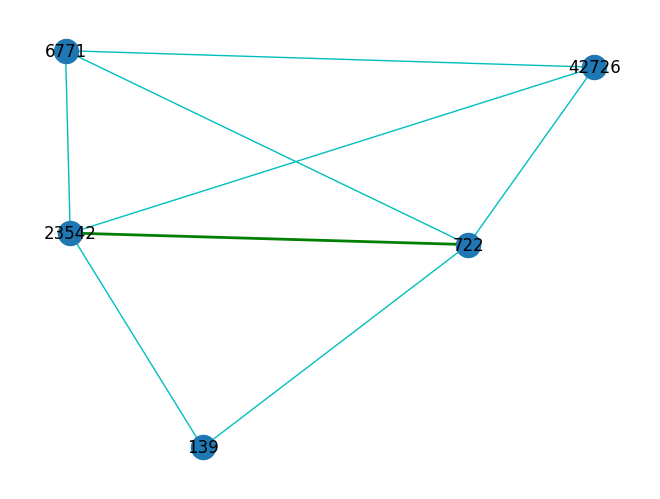

In [91]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c)
plt.show()

In [92]:
visualisationData

{139: 2, 722: 5, 23542: 5, 6771: 3, 42726: 3}

In [93]:
def get_node_color(strength):
  if strength>=5:
    return 'r'
  elif strength>=3:
    return 'g'
  else:
    return 'c'

In [94]:
nodes_colors = map(get_node_color, visualisationData.values())
nc=list(nodes_colors )
nc

['c', 'r', 'r', 'g', 'g']

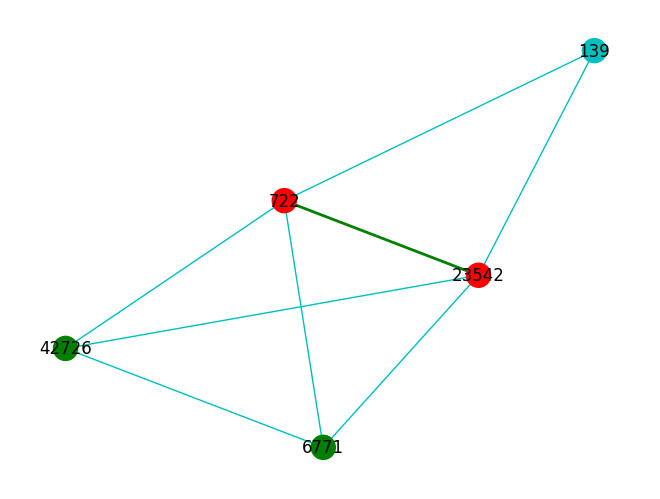

In [97]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c, node_color=nc)
plt.show()

**Usefull resources:**

[How to Deal With Files in Google Colab](https://neptune.ai/blog/google-colab-dealing-with-files)

[Guide for NetworkX library: Drawing basics](https://memgraph.github.io/networkx-guide/visualization/basics/)

[NetworkX: tutorial](https://networkx.org/documentation/stable/tutorial.html)

[How to handle JSON in Python](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/How_to_handle_JSON_in_Python%3F.ipynb#scrollTo=q1Z8Zs3385ya)